In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

from hpcom.channel import create_channel_parameters, full_line_model_default, full_line_model_wdm, full_line_model, hui
from hpcom.signal import create_wdm_parameters, generate_wdm, nonlinear_shift

ImportError: cannot import name 'hui' from 'hpcom.channel' (/home/esf0/anaconda3/envs/nn_env/lib/python3.9/site-packages/hpcom/channel.py)

In [63]:
import hpcom
from importlib import reload
reload(hpcom)

<module 'hpcom' from '/home/esf0/anaconda3/envs/nn_env/lib/python3.9/site-packages/hpcom/__init__.py'>

In [48]:
# create parameters
wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=0, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.2,
                                    gamma=1.2,
                                    noise_figure_db=-200,
                                    dispersion_parameter=16.8,
                                    dz=5)

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')), tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-01-18 16:07:33.512876: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-18 16:07:33.513661: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-18 16:07:33.556968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 16:07:33.557327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3070 Laptop GPU computeCapability: 8.6
coreClock: 1.56GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2023-01-18 16:07:33.557343: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-18 16:07:33.558781: I tensorflow/stream_executor/p

In [49]:
result = full_line_model(channel, wdm, verbose=2)

propagation took 986.968 ms
search x and y points took 14.827 ms
ber for x and y took 38.449 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): inf inf


In [50]:
points_x = result['points_x']
points_x_orig = result['points_orig_x']
points_x_shifted = result['points_x_shifted']
points_y = result['points_y']
points_y_orig = result['points_orig_y']
points_y_shifted = result['points_y_shifted']

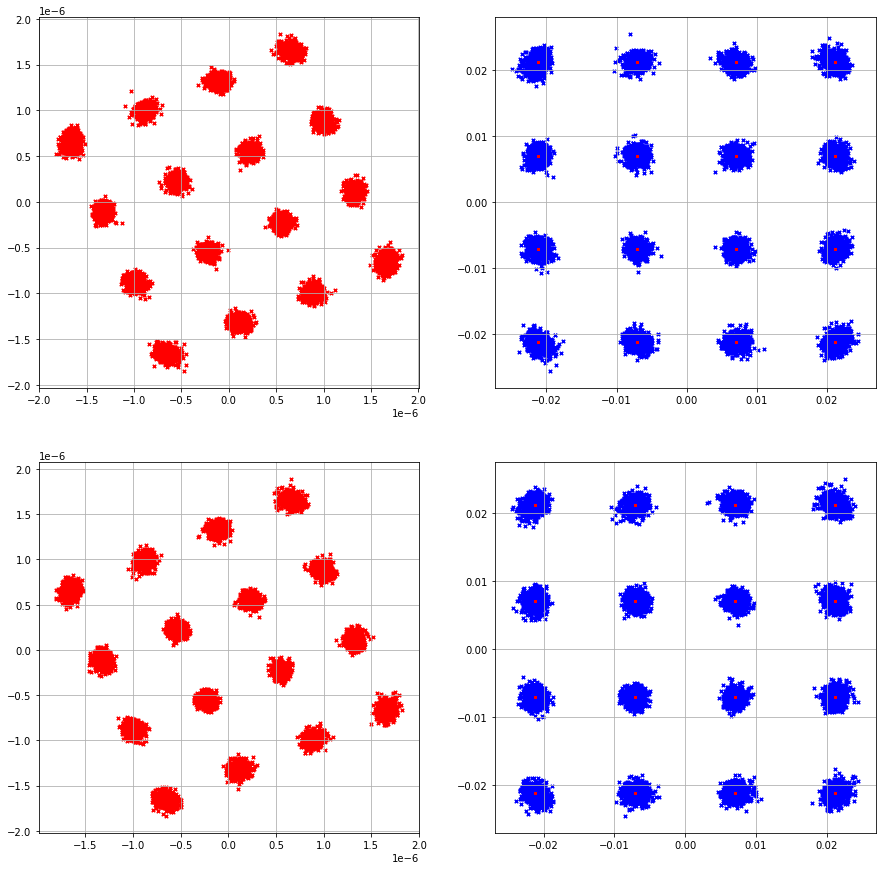

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_x.real, points_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_x_shifted.real, points_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_x_orig.real, points_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_y.real, points_y.imag, s=12, c='r', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_y_shifted.real, points_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_y_orig.real, points_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

In [52]:
result_wdm = full_line_model_wdm(channel, wdm, channels_type='middle', verbose=2)

propagation took 996.089 ms
search x and y points took 11.174 ms
ber for x and y took 31.167 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): inf inf


In [53]:
points_wdm_x = result_wdm['points_x']
points_wdm_x_orig = result_wdm['points_x_orig'][0]
points_wdm_x_shifted = result_wdm['points_x_shifted']
points_wdm_y = result_wdm['points_y']
points_wdm_y_orig = result_wdm['points_y_orig'][0]
points_wdm_y_shifted = result_wdm['points_y_shifted']

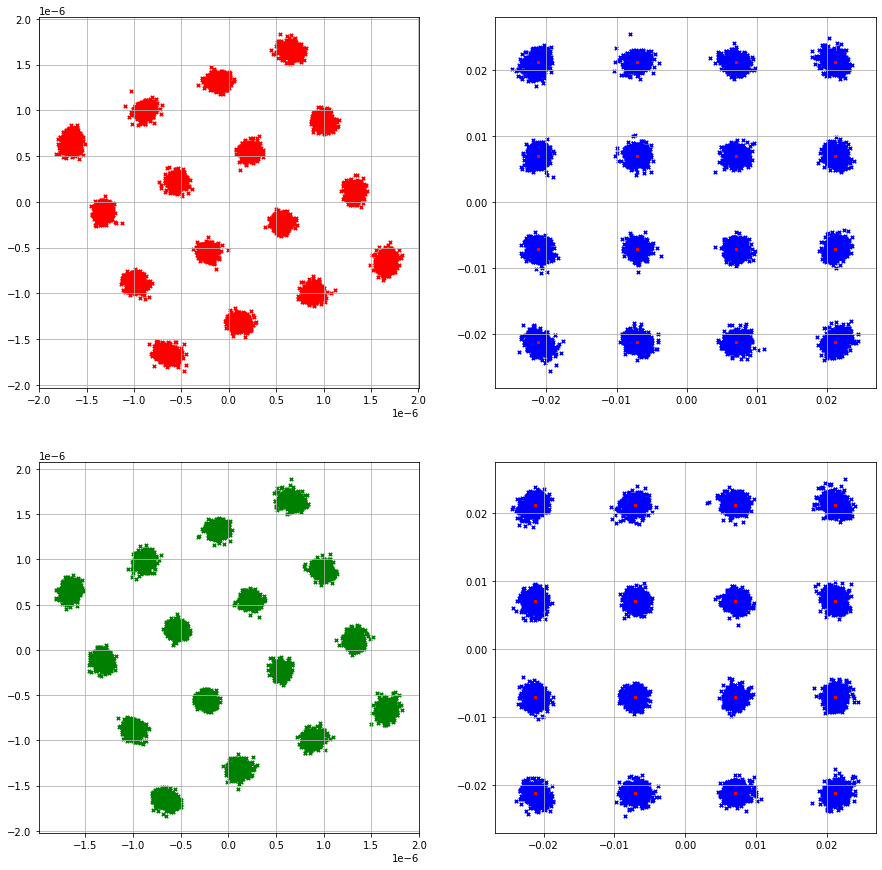

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_wdm_x.real, points_wdm_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_wdm_x_shifted.real, points_wdm_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_wdm_x_orig.real, points_wdm_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_wdm_y.real, points_wdm_y.imag, s=12, c='green', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_wdm_y_shifted.real, points_wdm_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_wdm_y_orig.real, points_wdm_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

In [55]:
nonlinear_shift(points_x, points_x_orig)

(15521.753935558-6569.466242305321j)

## Backward

In [64]:
result_back = hpcom.channel.full_line_model_back_to_back(channel, wdm, verbose=2)

AttributeError: module 'hpcom.channel' has no attribute 'full_line_model_back_to_back'

### Handmode

In [ ]:
channel_back = create_channel_parameters(n_spans=12,
                                         z_span=-80,
                                         alpha_db=0.2,
                                         gamma=1.2,
                                         noise_figure_db=-200,
                                         dispersion_parameter=16.8,
                                         dz=5)